In [1]:
import os
os.chdir("/content/drive/MyDrive/jason z ai and tech, first projects/amsterdamhouse")

In [2]:
!ls

house_price_prediction.ipynb  HousingPrices.csv


In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("HousingPrices.csv")

In [5]:
data.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [6]:
data.tail()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268
923,924,"S. F. van Ossstraat 334, Amsterdam",1068 JS,300000.0,79,4,4.810678,52.355493


# make a copy of the dataset, and I am going to do anything I want on the copy

In [7]:
df = data.copy()

In [8]:
df.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [9]:
df = df.drop(['Unnamed: 0', 'Address', 'Zip'], axis = 1)

In [10]:
df.head()

,Price,Area,Room,Lon,Lat
0,685000.0,64,3,4.907736,52.356157
1,475000.0,60,3,4.850476,52.348586
2,850000.0,109,4,4.944774,52.343782
3,580000.0,128,6,4.789928,52.343712
4,720000.0,138,5,4.902503,52.410538


In [11]:
print(df['Price'].max())

5950000.0


## correlation

In [12]:
df.corr()

,Price,Area,Room,Lon,Lat
Price,1.000000,0.835090,0.623448,-0.013561,0.062196
Area,0.835090,1.000000,0.812421,0.012196,0.017993
Room,0.623448,0.812421,1.000000,-0.036585,-0.016381
Lon,-0.013561,0.012196,-0.036585,1.000000,-0.184436
Lat,0.062196,0.017993,-0.016381,-0.184436,1.000000


In [13]:
correlation_matrix = df.corr()

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


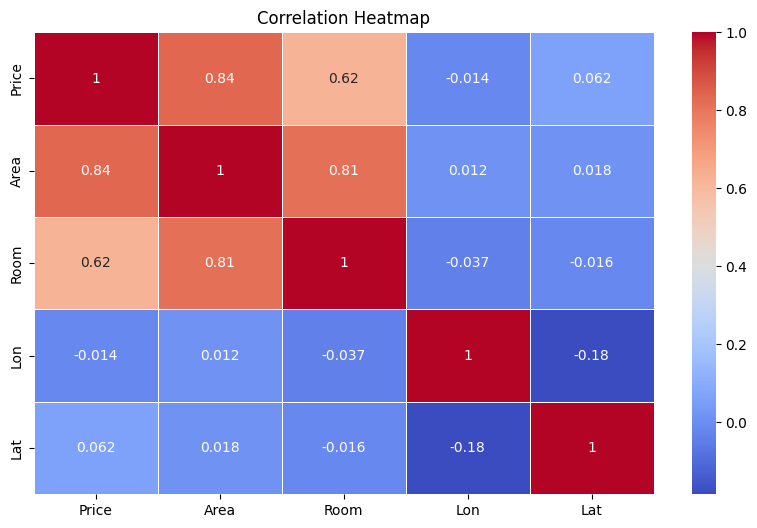

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
df.describe()

,Price,Area,Room,Lon,Lat
count,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,5.950000e+06,623.000000,14.000000,5.029122,52.423805


# IQR (Inter Quartile Range) for detection and deletion of outliers

In [17]:
import numpy as np

In [18]:
numerical_features = ["Price", "Area", "Room", "Lon", "Lat"]

In [19]:
def outliers_detection(d, feature):
  Q1 = np.percentile(d[feature], 25)
  Q3 = np.percentile(d[feature], 75)
  #IQR = Interquartile Range
  IQR = Q3-Q1
  l_bound = Q1-1.5*IQR
  u_bound = Q3+1.5*IQR
  outliers = d[(d[feature] < l_bound) | (d[feature]>u_bound)]
  return outliers


In [20]:
for feature in numerical_features:
  outliers = outliers_detection(df, feature)
  print(f"Number of outliers in {feature}: {len(outliers)}")

Number of outliers in Price: 0
Number of outliers in Area: 47
Number of outliers in Room: 102
Number of outliers in Lon: 3
Number of outliers in Lat: 48


#Remove these outliers,
Outliers are data points, these are far away from the remaining

In [21]:
def outliers_removed(d, feature):
    Q1 = np.percentile(d[feature], 25)
    Q3 = np.percentile(d[feature], 75)
    #IQR = Interquartile Range
    IQR = Q3-Q1
    l_bound = Q1-1.5*IQR
    u_bound = Q3+1.5*IQR
    return d[(d[feature] >= l_bound) & (d[feature] <= u_bound)]

In [22]:
listofoutliers = ["Area", "Room", "Lon", "Lat"]

In [23]:
df_clean = df.copy()

In [24]:
df_clean.isnull().sum()

,0
Price,4
Area,0
Room,0
Lon,0
Lat,0


In [25]:
df_clean.dropna(inplace=True)

In [41]:
df_clean.isnull().sum()

,0
Price,0
Area,0
Room,0
Lon,0
Lat,0
log_Price,0
log_Area,0
log_Room,0
log_Lon,0
log_Lat,0


In [26]:
for feature in listofoutliers:
  df_clean = outliers_removed(df_clean, feature)

In [27]:
df_clean

,Price,Area,Room,Lon,Lat
0,685000.0,64,3,4.907736,52.356157
1,475000.0,60,3,4.850476,52.348586
2,850000.0,109,4,4.944774,52.343782
4,720000.0,138,5,4.902503,52.410538
5,450000.0,53,2,4.875024,52.382228
...,...,...,...,...,...
916,525000.0,59,4,4.880977,52.368961
920,350000.0,72,3,4.890612,52.414587
921,350000.0,51,3,4.856935,52.363256
922,599000.0,113,4,4.965731,52.375268


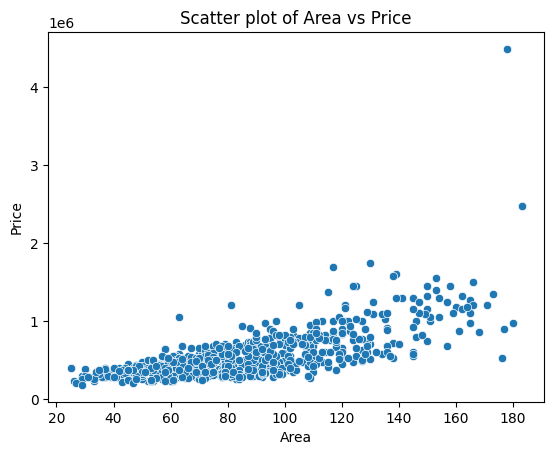

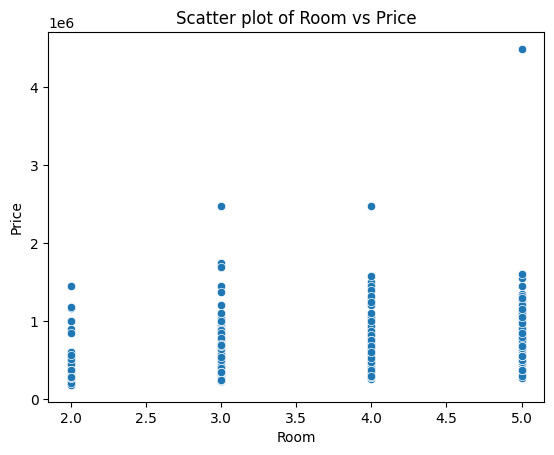

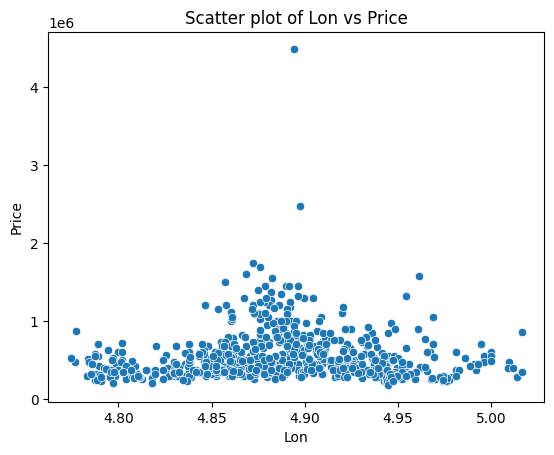

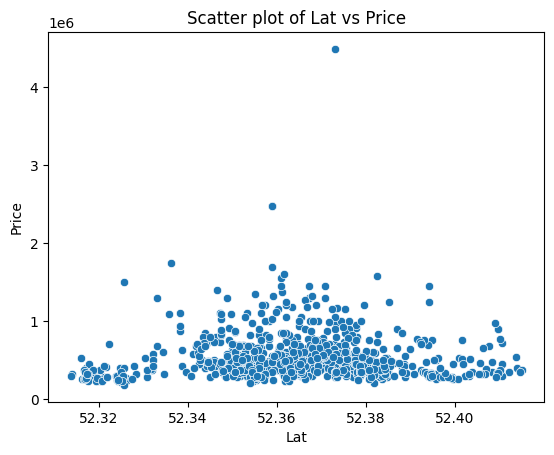

In [28]:
for f in listofoutliers:
  sns.scatterplot(x=df_clean[f], y = df_clean['Price'])
  plt.title(f'Scatter plot of {f} vs Price')
  plt.show()

#log transformation

In [29]:
df_clean['log_Price'] = np.log(df_clean['Price'])
df_clean['log_Area'] = np.log(df_clean['Area'])
df_clean['log_Room'] = np.log(df_clean['Room'])
df_clean['log_Lon'] = np.log(df_clean['Lon'])
df_clean['log_Lat'] = np.log(df_clean['Lat'])

In [30]:
df_clean

,Price,Area,Room,Lon,Lat,log_Price,log_Area,log_Room,log_Lon,log_Lat
0,685000.0,64,3,4.907736,52.356157,13.437174,4.158883,1.098612,1.590813,3.958070
1,475000.0,60,3,4.850476,52.348586,13.071070,4.094345,1.098612,1.579077,3.957925
2,850000.0,109,4,4.944774,52.343782,13.652992,4.691348,1.386294,1.598331,3.957833
4,720000.0,138,5,4.902503,52.410538,13.487006,4.927254,1.609438,1.589746,3.959108
5,450000.0,53,2,4.875024,52.382228,13.017003,3.970292,0.693147,1.584125,3.958567
...,...,...,...,...,...,...,...,...,...,...
916,525000.0,59,4,4.880977,52.368961,13.171154,4.077537,1.386294,1.585345,3.958314
920,350000.0,72,3,4.890612,52.414587,12.765688,4.276666,1.098612,1.587317,3.959185
921,350000.0,51,3,4.856935,52.363256,12.765688,3.931826,1.098612,1.580408,3.958205
922,599000.0,113,4,4.965731,52.375268,13.303017,4.727388,1.386294,1.602561,3.958434


In [31]:
features = ['log_Area', 'log_Room', 'log_Lon', 'log_Lat']

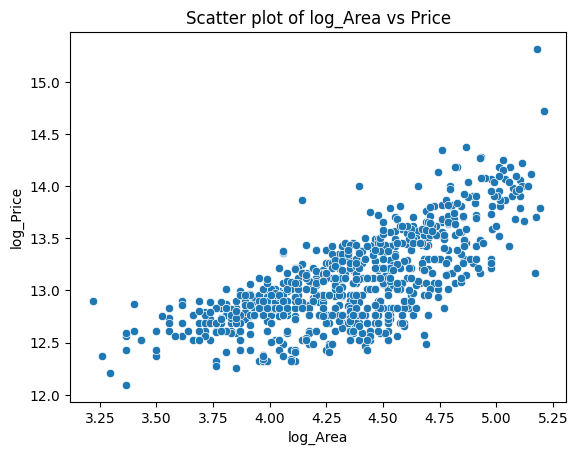

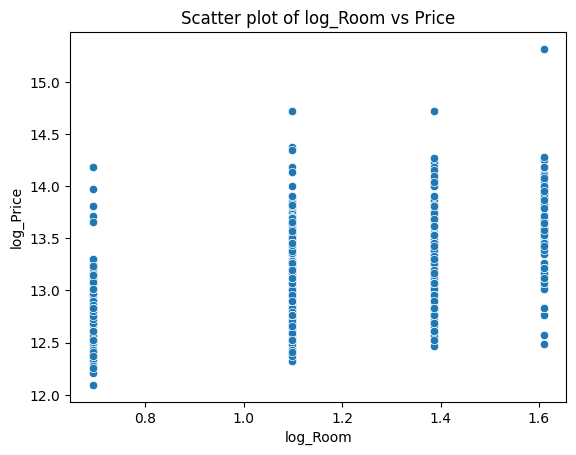

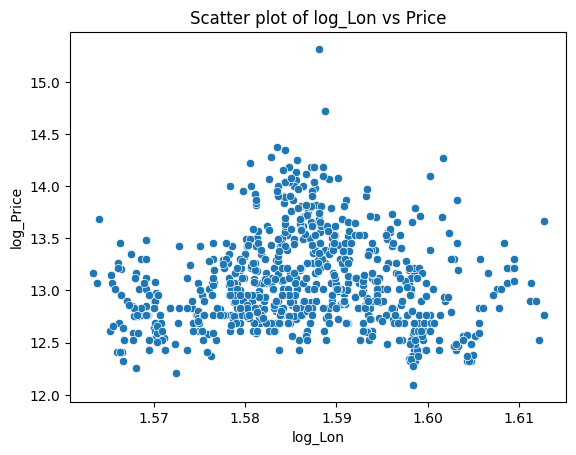

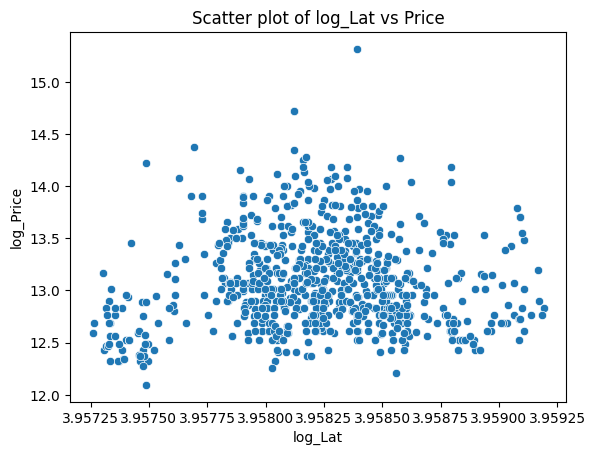

In [32]:
for f in features:
  sns.scatterplot(x=df_clean[f], y = df_clean['log_Price'])
  plt.title(f'Scatter plot of {f} vs Price')
  plt.show()

#linear regression    

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
from sklearn.model_selection import train_test_split

# y = b + mx


In [35]:
df_clean.head()

,Price,Area,Room,Lon,Lat,log_Price,log_Area,log_Room,log_Lon,log_Lat
0,685000.0,64,3,4.907736,52.356157,13.437174,4.158883,1.098612,1.590813,3.958070
1,475000.0,60,3,4.850476,52.348586,13.071070,4.094345,1.098612,1.579077,3.957925
2,850000.0,109,4,4.944774,52.343782,13.652992,4.691348,1.386294,1.598331,3.957833
4,720000.0,138,5,4.902503,52.410538,13.487006,4.927254,1.609438,1.589746,3.959108
5,450000.0,53,2,4.875024,52.382228,13.017003,3.970292,0.693147,1.584125,3.958567


In [36]:
Y = df_clean['log_Price']
X = df_clean.drop(['Price', 'Area', 'Room', 'Lon', 'Lat', 'log_Price'], axis =1)

In [37]:
Y.shape

(762,)

In [38]:
X.shape

(762, 4)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [40]:
linreg= LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred1 = linreg.predict(X_test)

In [44]:
linreg.score(X_test, y_test)

0.46499479208147565

In [45]:
linreg.score(X_train, y_train)

0.5279479213237173

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
model1 = GradientBoostingRegressor()

In [48]:
model1.fit(X_train, y_train)

GradientBoostingRegressor()

In [49]:
model1.score(X_train, y_train)

0.9387596256416133

In [50]:
model1.score(X_test, y_test)

0.884611819667568